In [33]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PolynomialFeatures

In [2]:
df = pd.read_csv('../Data/galway_rentals.txt', delimiter='\t')

In [3]:
""" Encoding categorical features
Ordinal features:
    ber: a->exempt
    floor: third, second, first, ground

Nominal features: - no order
    type: house, studio, apartment, townhouse
    heating: central, electric, NA
    Balcony: yes, no
"""
ber = ['a', 'b1', 'b2', 'b3', 'c1', 'c2', 'c3', 'd1', 'd2', 'e1', 'e2', 'f', 'g', 'exempt']
floor = ['third', 'second', 'first', 'ground']
ord_encoder = OrdinalEncoder(categories = [ber, floor])
df[['ber', 'floor']] = ord_encoder.fit_transform(df[["ber", 'floor']])

#lab_encoder = LabelEncoder()
oh_encoder = OneHotEncoder(sparse=False)
# transform data
oh_type = pd.DataFrame(oh_encoder.fit_transform(df[['type']]), columns=['apartment', "house", "studio", 'townhouse'])
oh_heating = pd.DataFrame(oh_encoder.fit_transform(df[['heating']]), columns=['central', "electric", "na"])
oh_balcony = pd.DataFrame(oh_encoder.fit_transform(df[['balcony']]),  columns=['no_balcony', "has_balcony"])

In [4]:
df = pd.concat([df, oh_type], axis=1)
df = pd.concat([df, oh_heating], axis=1)
df = pd.concat([df, oh_balcony], axis=1)
df.drop(columns=['type', 'balcony', 'heating'], axis=0, inplace=True)

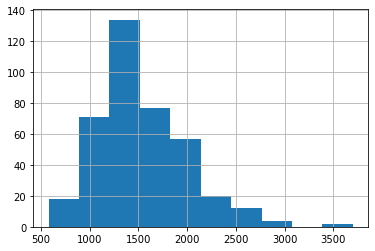

In [5]:
df['price_per_month'].hist(bins=10)

In [6]:
df['price_cat'] = pd.cut(df['price_per_month'], 
                        bins=[0,1200,1500, 2000,np.inf],
                        labels=[1,2,3,4])

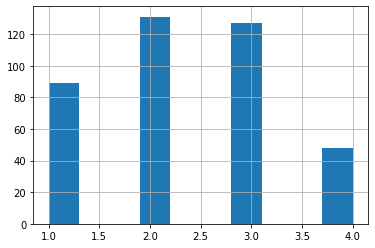

In [7]:
df['price_cat'].hist()

In [27]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=50)
for train_index, test_index in split.split(df, df['price_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    
for i in (strat_train_set,strat_test_set):
    i.drop('price_cat', axis=1, inplace=True)
    
target = 'price_per_month'
features = list(strat_train_set.columns)[1:]

X_train, y_train = strat_train_set[features], strat_train_set[target]
X_test, y_test = strat_test_set[features], strat_test_set[target]

In [13]:
corr_matrix = df.corr()
corr_matrix["price_per_month"].sort_values(ascending=False)

price_per_month         1.000000
num_bedrooms            0.722936
num_bathrooms           0.545036
house                   0.485180
central                 0.276742
distance_gmit           0.092388
townhouse               0.090741
floor                   0.088034
has_balcony             0.008518
no_balcony             -0.008518
na                     -0.052071
distance_eyre_square   -0.142780
distance_salthill      -0.164176
ber                    -0.195112
distance_nuig          -0.219144
studio                 -0.252592
electric               -0.266251
apartment              -0.422840
Name: price_per_month, dtype: float64

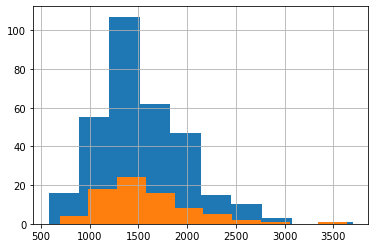

In [10]:
strat_train_set['price_per_month'].hist(label="train")
strat_test_set['price_per_month'].hist(label='test')

In [35]:
sgd_reg = SGDRegressor(max_iter =1000, tol=1e-3, penalty=None, eta0=0.1)
scores = cross_val_score(sgd_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

In [36]:
rmse_scores = np.sqrt(-scores)

In [42]:
sgd_reg.fit(X_train, y_train)
predictions = sgd_reg.predict(X_test)

In [39]:
print("Scores: ", rmse_scores)
print("Mean scores: ", np.mean(rmse_scores))
print("Std scores: ", np.std(rmse_scores))

Scores:  [7.58241666e+08 2.25359208e+06 6.75477994e+07 8.13525434e+08
 4.78266295e+09 1.19352305e+06 3.72718211e+07 7.61595091e+09
 5.91178145e+05 9.50803509e+09]
Mean scores:  2358727395.994735
Std scores:  3418860451.868728


In [43]:
predictions

array([-6.59213231e+07,  3.71182748e+06,  4.19320464e+07, -7.74159020e+07,
       -1.59065357e+08, -1.16261932e+08, -1.01499150e+08,  3.13448558e+07,
       -1.09799455e+08, -8.16327150e+07, -1.62080184e+08, -7.18125627e+07,
       -6.65340382e+07, -1.50243658e+08, -1.15902244e+08, -4.71224641e+07,
       -1.40525458e+08,  2.33363585e+05, -1.35246047e+08, -7.84155398e+07,
       -6.75469279e+07, -3.81854618e+07, -1.12573956e+08, -9.33634958e+07,
       -1.18343016e+09, -1.03000165e+08, -9.26033046e+07, -8.17359029e+07,
       -4.90281408e+07, -5.71646353e+07, -1.07058710e+08, -9.31711849e+07,
       -7.73709800e+07, -1.03286586e+08, -1.05645492e+08, -1.59367538e+08,
       -6.28175858e+07, -8.22508586e+07, -9.13341614e+07, -7.78265888e+07,
       -9.02880807e+07, -4.68419165e+07, -1.31160895e+08, -1.03902404e+08,
       -8.70884611e+07, -6.41888023e+07, -5.32572295e+07, -1.40807817e+08,
       -1.48075901e+08, -2.58238583e+07, -1.97409066e+08, -2.77669649e+07,
       -4.55752755e+07, -